In [117]:
import requests
import pandas as pd
import numpy as np
import matplotlib

In [118]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [119]:
df = pd.DataFrame(r.json()['data'])

In [120]:
df.value = df.value.astype(int)

In [121]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')

C:\Users\Dung\AppData\Local\Temp\ipykernel_14640\4061745750.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df.timestamp = pd.to_datetime(df.timestamp, unit='s')


In [52]:
df.set_index('timestamp', inplace=True)

<Axes: xlabel='timestamp'>

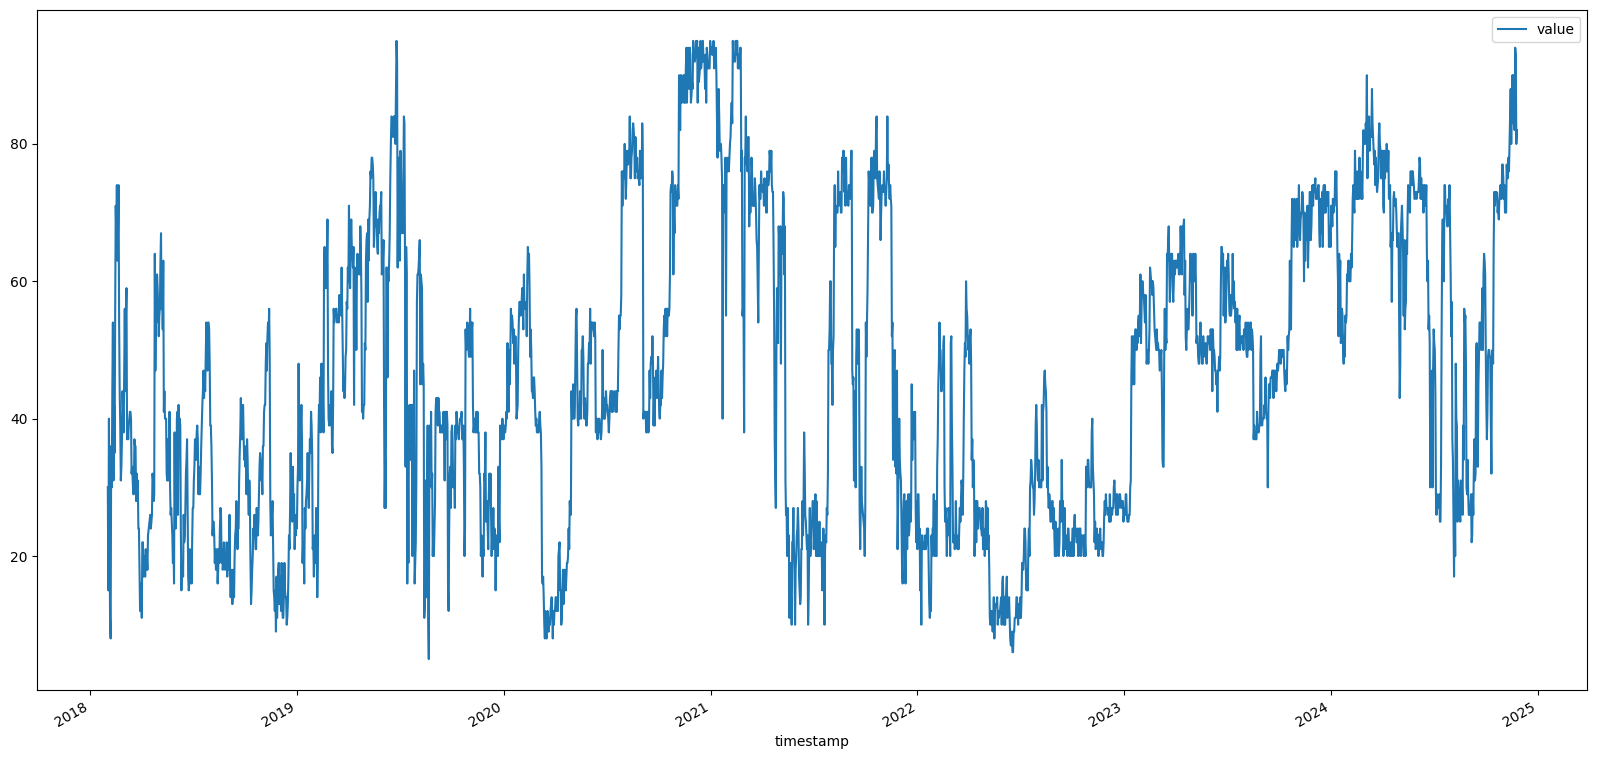

In [53]:
df.plot(figsize=(20,10))

In [54]:
df = df[::-1]

In [55]:
df

,value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2024-11-21,82,Extreme Greed,NaN
2024-11-22,94,Extreme Greed,NaN
2024-11-23,93,Extreme Greed,NaN


In [95]:
import yfinance as yf

In [96]:
df1 = yf.download('BTC-USD')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [97]:
df1

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-11-21,98504.726562
2024-11-22,98997.664062


In [98]:
df1.index.name = 'timestamp'

In [104]:
# Đặt lại tên cột trực tiếp
df1.columns = ['Close']

# Hiển thị kết quả
print(df1.head())

                 Close
timestamp             
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014


In [105]:
tog = df.merge(df1, on='timestamp')

In [107]:
tog['change'] = tog.Close.pct_change()

In [108]:
tog

,value,value_classification,time_until_update,Close,change
timestamp,,,,,
2018-02-01,30,Fear,NaN,9170.540039,NaN
2018-02-02,15,Extreme Fear,NaN,8830.750000,-0.037052
2018-02-03,40,Fear,NaN,9174.910156,0.038973
2018-02-04,24,Extreme Fear,NaN,8277.009766,-0.097865
2018-02-05,11,Extreme Fear,NaN,6955.270020,-0.159688
...,...,...,...,...,...
2024-11-21,82,Extreme Greed,NaN,98504.726562,0.044152
2024-11-22,94,Extreme Greed,NaN,98997.664062,0.005004
2024-11-23,93,Extreme Greed,NaN,97777.281250,-0.012327


In [109]:
tog['position'] = np.where(tog.value>50,1,0)

In [110]:
strategy = tog.position * tog.change

<Axes: xlabel='timestamp'>

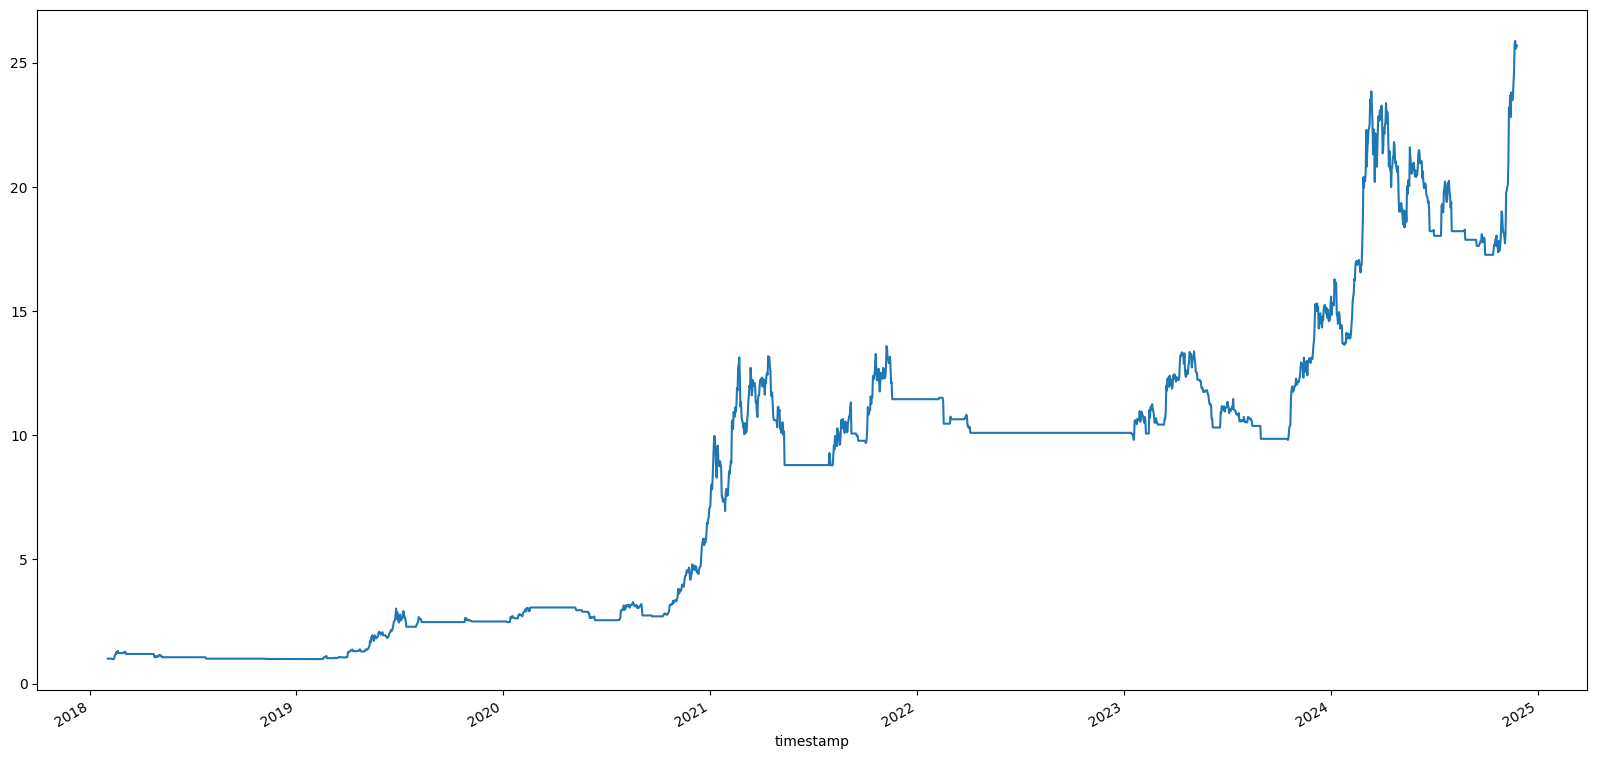

In [112]:
(strategy+1).cumprod().plot(figsize=(20,10))

In [114]:
import matplotlib.pyplot as plt

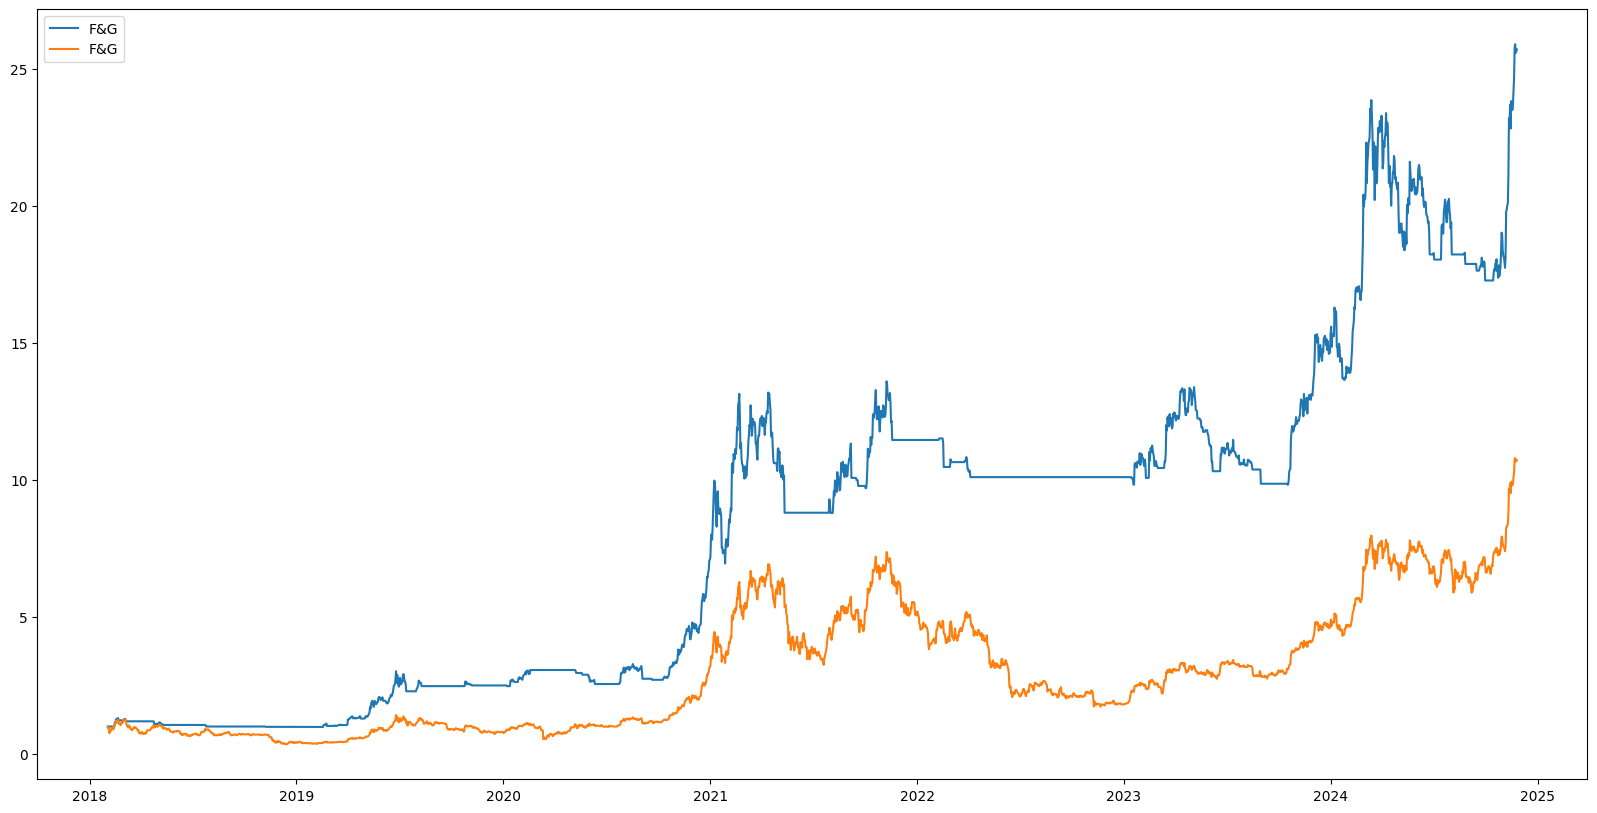

In [116]:
plt.figure(figsize=(20,10))
plt.plot((strategy+1).cumprod(), label='F&G')
plt.plot((tog.change+1).cumprod(), label='F&G')
plt.legend()